# CSCI 5521 — HW2 (CODE) — Question 2

**This notebook contains only the coding parts and you will need to submit a separate PDF for other parts of the homework.**
**INSTRUCTIONS**
- Make a copy of this template file to modify the file.
- Download and upload the below files on to the Colab environment. Do not modify the provided data files. Provided files:
  - training_data1.txt, training_data2.txt, training_data3.txt
  - test_data1.txt, test_data2.txt, test_data3.txt
- Implement the `TODO` sections

**SUBMISSION**

Complete and submit this file alongside a PDF file with the rest of your answers.

## Setup (Imports, Data Paths and Data Loader)

In [3]:
# TODO: Edit if your files are elsewhere

TRAIN_DATA_1   = "training_data1.txt"
TRAIN_DATA_2 = "training_data2.txt"
TRAIN_DATA_3 = "training_data3.txt"
TEST_DATA_1  = "test_data1.txt"
TEST_DATA_2  = "test_data2.txt"
TEST_DATA_3  = "test_data3.txt"


## Parameter Estimation

In [16]:
import numpy as np

def Param_Est(training_data, training_labels, part):
    """
    Implements parameter estimation for a 2-class Multivariate Gaussian

    Parameters:
    training_data: numpy array of shape (n, d) - training feature vectors
    training_labels: numpy array of shape (n,) - training labels (1 or 2)
    part: string - which model to use ('1', '2', or '3')

    Returns:
    m1: learned mean of features for class 1
    m2: learned mean of features for class 2
    S1: learned covariance matrix for features for class 1
    S2: learned covariance matrix for features for class 2
    """


    n, d = training_data.shape
    
    # Split samples into class 1 and 2
    train_class1 = training_data[training_labels == 1]
    train_class2 = training_data[training_labels == 2]

    N1 = len(train_class1)
    N2 = len(train_class2)  
    if N1 == 0:
        m1 = np.zeros(d)
    else:
        m1 = np.sum(train_class1, axis=0)/N1
    if N2 == 0:
        m2 = np.zeros(d)
    else:
        m2 = np.sum(train_class2, axis=0)/N2
   
    sum1 = (train_class1-m1).T @ (train_class1-m1)
    sum2 = (train_class2-m2).T @ (train_class2-m2)
    # Parameter estimation for 3 different models described in homework
    if part == '3':
        #TODO: compute parameters for model 3
        S = (sum1+sum2)/n
        S_diag = np.diag(np.diag(S))
        S1 = np.diag(S_diag)
        S2 = np.diag(S_diag)
        pass

    elif part == '2':
        #TODO: compute parameters for model 2
        S = (sum1+sum2)/n
        S1 = S
        S2 = S
        pass

    elif part == '1':
        #TODO: compute parameters for model 1
        S1 = sum1/N1
        S2 = sum2/N2
        pass

    else:
        S1 = np.zeros((d,d))
        S2 = np.zeros((d,d))

    return m1, m2, S1, S2

## Error Rate

In [5]:
def Error_Rate(predictions, labels):
    """
    Implements error rate calculation and prints the percentage of
    predicted labels that are incorrect.

    Parameters:
    predictions: numpy array - predicted labels
    labels: numpy array - true labels

    Returns:
    error rate
    """
    # TODO: compute error rate and print it out
    error_count = np.sum(predictions != labels)
    error_rate = error_count / len(labels)
    print(f"Error Rate: {error_rate*100:.2f}%")

    return error_rate

## Classification

In [17]:
from scipy.stats import multivariate_normal

def Classify(data, m1, m2, S1, S2, pc1, pc2):
    """
    Returns the predicted class for each row in data by computing the posterior
    probability that x is in class 1 vs. class 2, then comparing these posterior
    probabilities using the log odds.

    Parameters:
    data: numpy array of shape (n, d) - data points to classify
    m1, m2: numpy arrays - means for class 1 and class 2
    S1, S2: numpy arrays - covariance matrices for class 1 and class 2
    pc1, pc2: float - prior probabilities for class 1 and class 2

    Returns:
    predictions: numpy array - predicted class labels (1 or 2)
    """

    # TODO: calculate the discriminants log P(x|C) + log P(C) for both classes
    n, d = data.shape
    predictions = np.zeros(n)

    p_x_c1 = multivariate_normal.pdf(data, mean=m1, cov=S1)
    p_x_c2 = multivariate_normal.pdf(data, mean=m2, cov=S2)

    log_p_c1 = np.log(pc1)
    log_p_c2 = np.log(pc2)

    dis_c1 = np.log(p_x_c1) + log_p_c1
    dis_c2 = np.log(p_x_c2) + log_p_c2

    predictions = np.where(dis_c1 > dis_c2, 1, 2)
    #TODO: Calculate log odds: log(P(C1|x) / P(C2|x))
    log_odds = dis_c1 - dis_c2

    # TODO: compare the discriminants to classify the data into two classes
    predictions[log_odds >= 0] = 1
    predictions[log_odds < 0] = 2
    pass

    return predictions

## Run training and test

In [18]:
def run(training_file, test_file):
    """
    Main function to run classification experiments with three different models

    Parameters:
    training_file: string - path to training data file
    test_file: string - path to test data file
    """

    # Model parts to test
    parts = ['1', '2', '3']

    # Load data
    training_data = np.loadtxt(training_file, delimiter=',', dtype=np.float64)
    test_data = np.loadtxt(test_file, delimiter=',', dtype=np.float64)

    # Remove labels from data (last column)
    training_labels = training_data[:, -1].astype(int)
    training_data = training_data[:, :-1]
    test_labels = test_data[:, -1].astype(int)
    test_data = test_data[:, :-1]

    # Learn prior probabilities
    pc1 = np.sum(training_labels == 1) / len(training_labels)
    pc2 = 1 - pc1

    print(f"Prior probabilities: P(C1) = {pc1:.4f}, P(C2) = {pc2:.4f}")
    print(f"Training data shape: {training_data.shape}")
    print(f"Test data shape: {test_data.shape}")
    print("=" * 50)

    # Test each model
    for i, part in enumerate(parts):
        print(f'Model {part}')

        # Training
        m1, m2, S1, S2 = Param_Est(training_data, training_labels, part)
        predictions = Classify(training_data, m1, m2, S1, S2, pc1, pc2)
        print('Training error:')
        Error_Rate(predictions, training_labels)

        # Testing
        predictions = Classify(test_data, m1, m2, S1, S2, pc1, pc2)
        print('Test error:')
        Error_Rate(predictions, test_labels)

        print('\n')

## Test MLE implementation

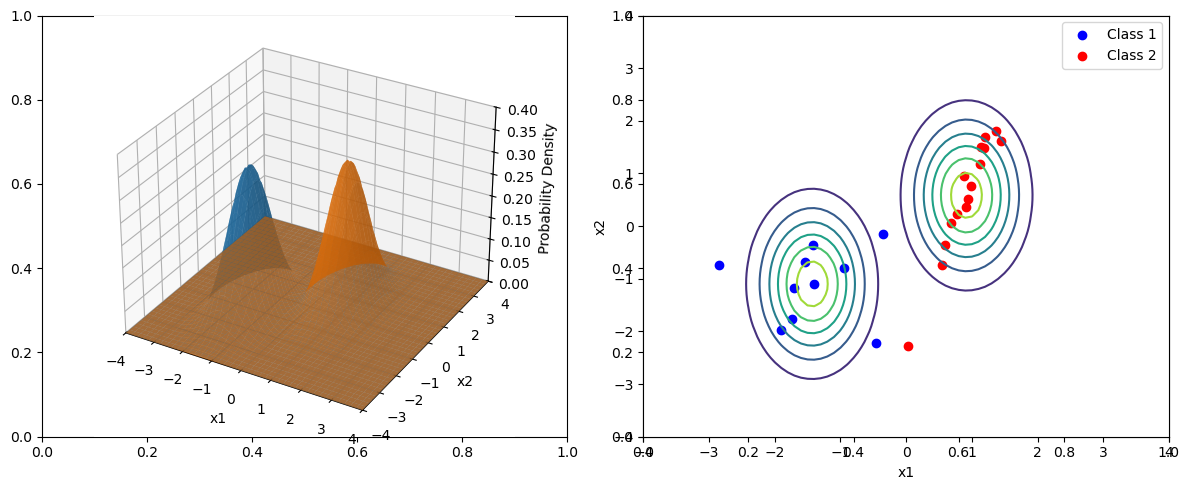

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.io import loadmat

data = loadmat('toy_gaussian.mat')
training_data = data['training_data']
training_labels = data['training_labels'].flatten()



# Parameter estimation try three models with options "1", "2" and "3"
mu1, mu2, Sigma1, Sigma2 = Param_Est(training_data, training_labels, '3')

# Calculate prior probabilities
pc1 = np.sum(training_labels == 1) / len(training_labels)
pc2 = 1 - pc1


x1 = np.arange(-4, 4.1, 0.1)
x2 = np.arange(-4, 4.1, 0.1)


X1, X2 = np.meshgrid(x1, x2)

# Calculate PDF for class 1
rv1 = multivariate_normal(mu1, Sigma1)
F1 = rv1.pdf(np.dstack((X1, X2)))

# Calculate PDF for class 2
rv2 = multivariate_normal(mu2, Sigma2)
F2 = rv2.pdf(np.dstack((X1, X2)))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X1, X2, F1, alpha=0.7, label='Class 1')
ax1.plot_surface(X1, X2, F2, alpha=0.7, label='Class 2')
ax1.set_xlim([-4, 4])
ax1.set_ylim([-4, 4])
ax1.set_zlim([0, 0.4])
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('Probability Density')


ax2 = fig.add_subplot(122)
ax2.contour(X1, X2, F1)
ax2.contour(X1, X2, F2)

idx1 = training_labels == 1
idx2 = training_labels == 2
ax2.scatter(training_data[idx1, 0], training_data[idx1, 1], c='blue', label='Class 1')
ax2.scatter(training_data[idx2, 0], training_data[idx2, 1], c='red', label='Class 2')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.legend()

plt.tight_layout()
plt.show()

You should see the following plots
Model 1 arbitrary covariance matrix:
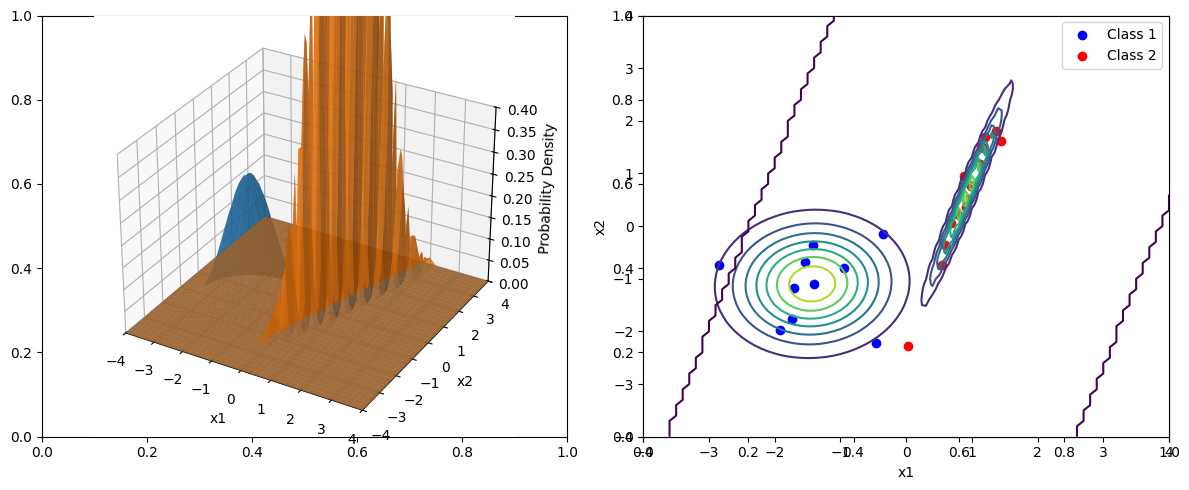

Model 2 shared covariance matrix:

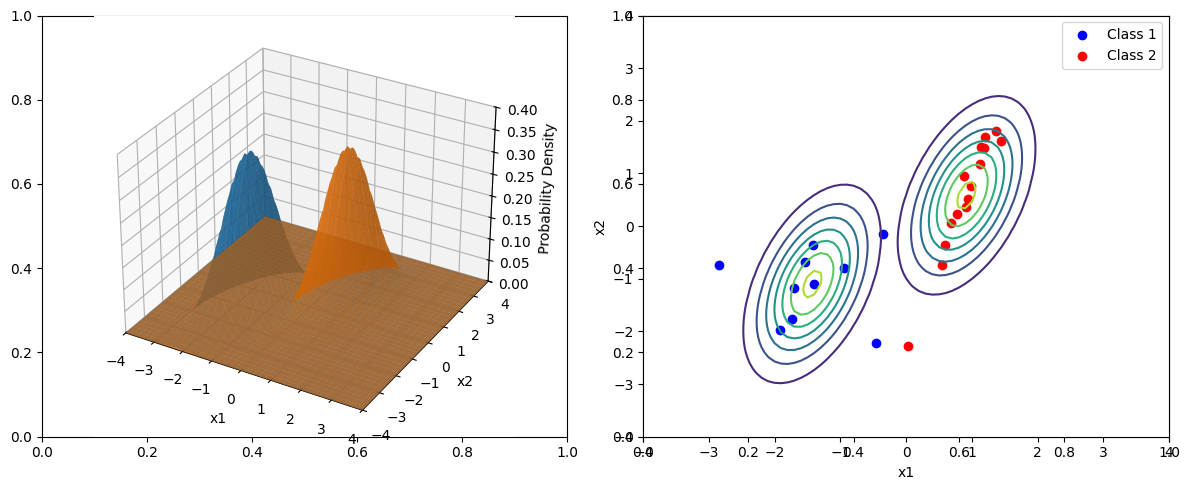

Model 3 diagnoal covariance matrix:


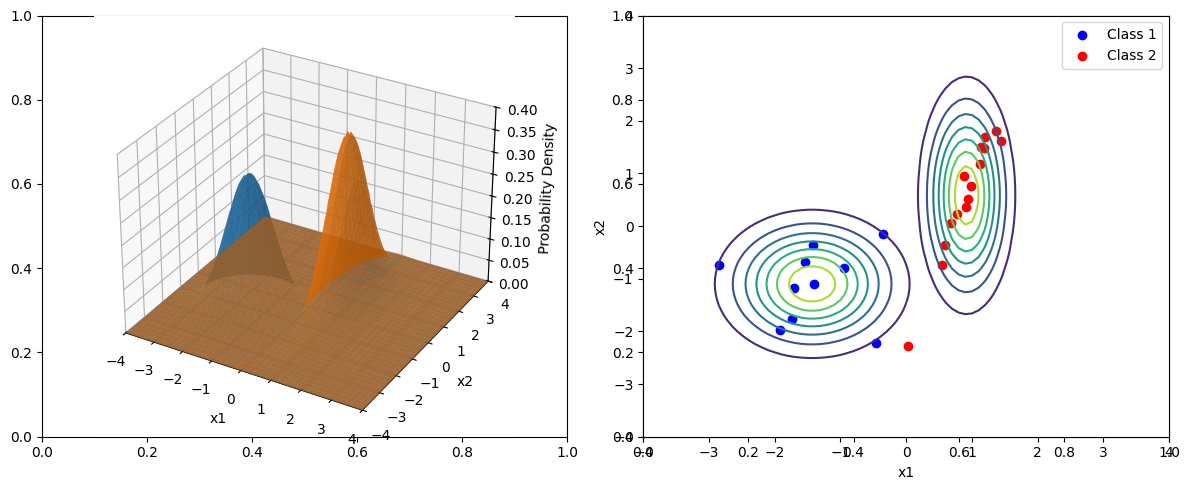


## Dataset 1

In [20]:
## Run the experiments on Dataset 1
run(TRAIN_DATA_1, TEST_DATA_1)

Prior probabilities: P(C1) = 0.3000, P(C2) = 0.7000
Training data shape: (100, 8)
Test data shape: (100, 8)
Model 1
Training error:
Error Rate: 5.00%
Test error:
Error Rate: 22.00%


Model 2
Training error:
Error Rate: 6.00%
Test error:
Error Rate: 17.00%


Model 3
Training error:
Error Rate: 6.00%
Test error:
Error Rate: 15.00%




## Dataset 2

In [21]:
## Run the experiments on Dataset 2
run(TRAIN_DATA_2, TEST_DATA_2)

Prior probabilities: P(C1) = 0.3000, P(C2) = 0.7000
Training data shape: (100, 8)
Test data shape: (100, 8)
Model 1
Training error:
Error Rate: 7.00%
Test error:
Error Rate: 23.00%


Model 2
Training error:
Error Rate: 14.00%
Test error:
Error Rate: 55.00%


Model 3
Training error:
Error Rate: 14.00%
Test error:
Error Rate: 59.00%




## Dataset 3

In [22]:
## Run the experiments on Dataset 3
run(TRAIN_DATA_3, TEST_DATA_3)

Prior probabilities: P(C1) = 0.3000, P(C2) = 0.7000
Training data shape: (100, 8)
Test data shape: (100, 8)
Model 1
Training error:
Error Rate: 1.00%
Test error:
Error Rate: 11.00%


Model 2
Training error:
Error Rate: 19.00%
Test error:
Error Rate: 45.00%


Model 3
Training error:
Error Rate: 21.00%
Test error:
Error Rate: 50.00%


